In [1]:
"""
‫برای حل این تمرین از آموزش‌های موجود در این سایت استفاده کرده‌ام: 
http://stevemorphet.weebly.com/speech-and-audio-processing/category/all */
"""
import numpy as np
from __future__ import division
from scipy.io import wavfile
from numpy import linspace
from IPython import display
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift


In [2]:
display.HTML("<audio controls><source src='{}'></audio>"
             .format('audio.ogg'))


In [3]:
filename = 'audio.wav'
fs, signal = wavfile.read(filename)
signal = signal / max(abs(signal))  #scale signal

print('fs           ==> ', fs, 'Hz')
print('len(signal)  ==> ', len(signal), 'samples')


fs           ==>  48000 Hz
len(signal)  ==>  528000 samples


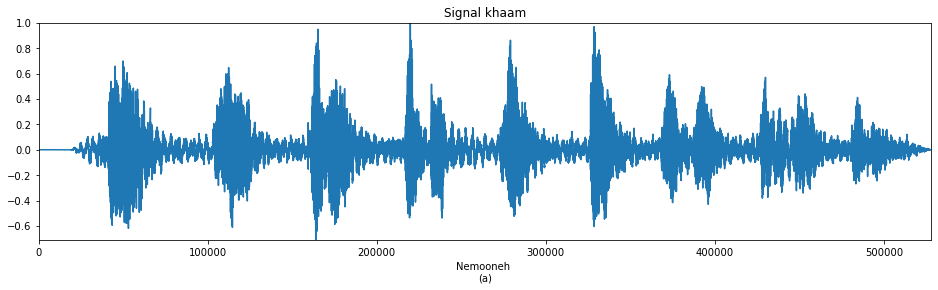

In [4]:
"""
رسم سیگنال خام
"""
_, (sp1) = plt.subplots(1, figsize=(16, 4))
sp1.plot(signal)
sp1.set_title('Signal khaam')
sp1.set_xlabel('Nemooneh \n(a)')
sp1.autoscale(tight='both')

In [5]:
"""
پنجره‌گذاری با اندازه‌ی ۳۰ میلی ثانیه و محاسبه انرژی
"""
sampsPerMilli = int(fs / 1000)
millisPerFrame = 30
sampsPerFrame = sampsPerMilli * millisPerFrame
nFrames = int(len(signal) / sampsPerFrame)

print('samples/millisecond  ==> ', sampsPerMilli)
print('samples/[%dms]frame  ==> ' % millisPerFrame, sampsPerFrame)
print('number of frames     ==> ', nFrames)

STEs = [] # list of short-time energies
for k in range(0, nFrames, 10): # 10ms shift midahim
    startIdx = k * sampsPerFrame
    stopIdx = startIdx + sampsPerFrame
    window = np.zeros(signal.shape)
    #print('at k == %d, dif is ' % k,stopIdx-startIdx)
    window[startIdx:stopIdx] = np.hamming(stopIdx-startIdx) # hamming window
    STE = sum((signal ** 2) * (window ** 2))
    STEs.append(STE)

samples/millisecond  ==>  48
samples/s]frame  ==>  1440
number of frames     ==>  366


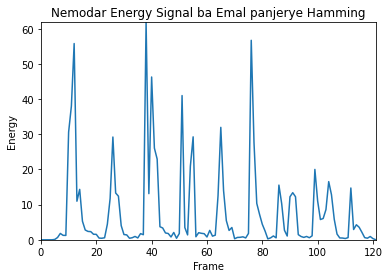

In [6]:
"""
رسم نمودار انرژی سیگنال
"""
plt.plot(STEs)
plt.title('Nemodar Energy Signal ba Emal panjerye Hamming')
plt.ylabel('Energy')
plt.xlabel('Frame')
plt.autoscale(tight='both');

In [7]:
"""
محاسبه نرخ عبور صفر
"""
ZCRs = []
for i in range(0, nFrames, 10): # 10ms shift midahim
    startIdx = i * sampsPerFrame
    stopIdx = startIdx + sampsPerFrame
    s = signal[startIdx:stopIdx]
    ZCR = 0
    for k in range(1, len(s)):
        ZCR += 0.5 * abs(np.sign(s[k]) - np.sign(s[k - 1]))
    ZCRs.append(ZCR)

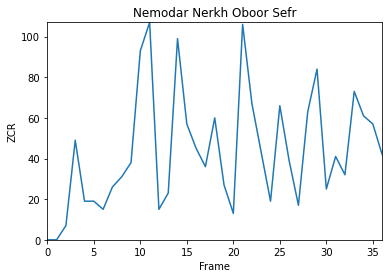

In [8]:
"""
رسم نمودار نرخ عبور صفر
"""
plt.plot(ZCRs)
plt.title('Nemodar Nerkh Oboor Sefr')
plt.ylabel('ZCR')
plt.xlabel('Frame')
plt.autoscale(tight='both');